<a href="https://colab.research.google.com/github/QQmberling/blog/blob/master/old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & Mount drive & def Confusion Matrix

In [ ]:
!pip install python-resize-image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
from resizeimage import resizeimage
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools
import random
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import model_from_yaml
import time

ImportError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/NeuralNetwork/Data/train/

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model 1

In [ ]:
epochs = 50
batch_size = 10
input_shape = (180, 320, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))

Adam = keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/train',
    target_size= input_shape[:2:],
    batch_size = batch_size,
    class_mode='binary',)

test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/test',
    target_size = input_shape[:2:],
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
    )

print(train_generator.class_indices)

Found 224 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
{'gandalfs': 0, 'sarumans': 1}


In [ ]:
start_time = time.clock()

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = test_set, 
    validation_steps = test_set.samples // batch_size,
    epochs = epochs)

end_time = time.clock()

print(end_time - start_time, 'seconds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Epoch 1/50
22/22 [==============================] - 150s 7s/step - loss: 1.2461 - accuracy: 0.6089 - val_loss: 0.9704 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - 37s 2s/step - loss: 0.6876 - accuracy: 0.7287 - val_loss: 1.9165 - val_accuracy: 0.5000
Epoch 3/50
22/22 [==============================] - 37s 2s/step - loss: 0.3006 - accuracy: 0.8631 - val_loss: 2.6860 - val_accuracy: 0.5000
Epoch 4/50
22/22 [==============================] - 37s 2s/step - loss: 0.3118 - accuracy: 0.8659 - val_loss: 3.6112 - val_accuracy: 0.5000
Epoch 5/50
22/22 [==============================] - 37s 2s/step - loss: 0.2592 - accuracy: 0.9190 - val_loss: 4.5448 - val_accuracy: 0.5000
Epoch 6/50
22/22 [==============================] - 37s 2s/step - loss: 0.2796 - accuracy: 0.8582 - val_loss: 5.7842 - val_accuracy: 0.5000
Epoch 7/50
22/22 [==============================] - 37s 2s/step - loss: 0.1782 - accuracy: 0.9262 - val_loss: 6.4717 - val_accuracy: 0.5000
Epoch 8/50
22/22 [=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[[36  4]
 [ 4 36]]
              precision    recall  f1-score   support

     Gandalf       0.90      0.90      0.90        40
     Saruman       0.90      0.90      0.90        40

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

Confusion matrix, without normalization


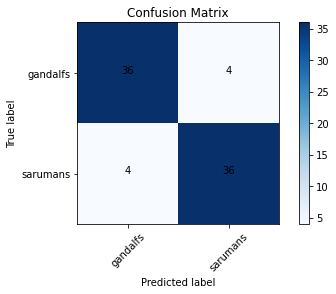

In [ ]:
Y_pred = model.predict(test_set, steps = test_set.samples // batch_size)
y_pred = np.round(Y_pred, 0)
cm = confusion_matrix(test_set.classes, y_pred)

print(cm)
target_names = ['Gandalf', 'Saruman']

print(classification_report(test_set.classes, y_pred, target_names = target_names))

cm_plot_labels = ['gandalfs','sarumans']    
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Model 2

In [ ]:
epochs = 25
batch_size = 5
input_shape = (180, 320, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))

Adam = keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
 #   validation_split=0.2) # Для модели с validation'ом

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/train',
    target_size= input_shape[:2:],
    batch_size = batch_size,
    class_mode='binary',)
#    subset='training') # Для модели с validation'ом

# validation_generator = train_datagen.flow_from_directory(   # Модель с validation'омт
#     '/content/gdrive/MyDrive/NeuralNetwork/Data/train', # same directory as training data
#     target_size = input_shape[:2:],
#     batch_size= batch_size,
#     class_mode='binary',
#     subset='validation') # set as validation data

test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/test',
    target_size = input_shape[:2:],
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
    )
print(train_generator.class_indices)

Found 224 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
{'gandalfs': 0, 'sarumans': 1}


In [ ]:
start_time = time.clock()

# model.fit(            # Модель с validation'ом
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = epochs)

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = test_set, 
    validation_steps = test_set.samples // batch_size,
    epochs = epochs)

end_time = time.clock()

print(end_time - start_time, 'seconds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Epoch 1/25
44/44 [==============================] - 30s 672ms/step - loss: 1.2670 - accuracy: 0.6596 - val_loss: 1.1511 - val_accuracy: 0.5000
Epoch 2/25
44/44 [==============================] - 29s 664ms/step - loss: 0.7416 - accuracy: 0.7459 - val_loss: 3.1408 - val_accuracy: 0.5000
Epoch 3/25
44/44 [==============================] - 29s 664ms/step - loss: 0.3329 - accuracy: 0.8550 - val_loss: 4.6283 - val_accuracy: 0.5000
Epoch 4/25
44/44 [==============================] - 29s 660ms/step - loss: 0.2814 - accuracy: 0.8706 - val_loss: 4.7072 - val_accuracy: 0.5000
Epoch 5/25
44/44 [==============================] - 29s 657ms/step - loss: 0.3386 - accuracy: 0.8425 - val_loss: 4.6533 - val_accuracy: 0.5000
Epoch 6/25
44/44 [==============================] - 29s 659ms/step - loss: 0.2080 - accuracy: 0.8902 - val_loss: 4.2373 - val_accuracy: 0.5000
Epoch 7/25
44/44 [==============================] - 29s 666ms/step - loss: 0.2078 - accuracy: 0.9312 - val_loss: 4.4606 - val_accuracy: 0.4625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[[32  8]
 [ 1 39]]
              precision    recall  f1-score   support

     Gandalf       0.97      0.80      0.88        40
     Saruman       0.83      0.97      0.90        40

    accuracy                           0.89        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.89      0.89        80

Confusion matrix, without normalization


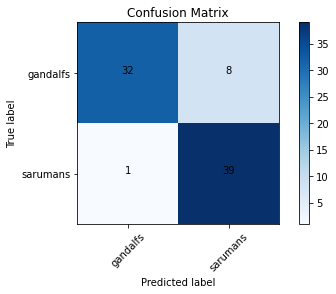

In [ ]:
Y_pred = model.predict(test_set, steps = test_set.samples // batch_size)
y_pred = np.round(Y_pred, 0)
cm = confusion_matrix(test_set.classes, y_pred)

print(cm)
target_names = ['Gandalf', 'Saruman']

print(classification_report(test_set.classes, y_pred, target_names = target_names))

cm_plot_labels = ['gandalfs','sarumans']    
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Model 3

In [ ]:
epochs = 80
batch_size = 10
input_shape = (180, 320, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation = 'sigmoid'))

Adam = keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/train',
    target_size= input_shape[:2:],
    batch_size = batch_size,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/NeuralNetwork/Data/test',
    target_size = input_shape[:2:],
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False)

print(train_generator.class_indices)

Found 224 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
{'gandalfs': 0, 'sarumans': 1}


In [ ]:
start_time = time.clock()

model.fit( # Модель с validation'ом
train_generator,
steps_per_epoch = train_generator.samples // batch_size,
validation_data = validation_generator,
validation_steps = validation_generator.samples // batch_size,
epochs = epochs)
model.fit( train_generator, steps_per_epoch = train_generator.samples // batch_size, validation_data = test_set, validation_steps = test_set.samples // batch_size, epochs = epochs)

end_time = time.clock()

print(end_time - start_time, 'seconds')

[[34  6]
 [ 2 38]]
              precision    recall  f1-score   support

     Gandalf       0.94      0.85      0.89        40
     Saruman       0.86      0.95      0.90        40

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

Confusion matrix, without normalization


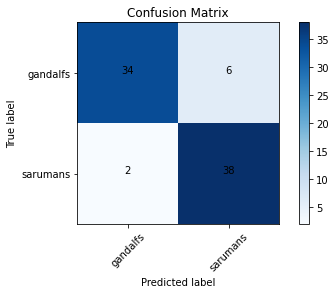

In [ ]:
Y_pred = model.predict(test_set, steps = test_set.samples // batch_size)
y_pred = np.round(Y_pred, 0)
cm = confusion_matrix(test_set.classes, y_pred)

print(cm)
target_names = ['Gandalf', 'Saruman']

print(classification_report(test_set.classes, y_pred, target_names = target_names))

cm_plot_labels = ['gandalfs','sarumans']    
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

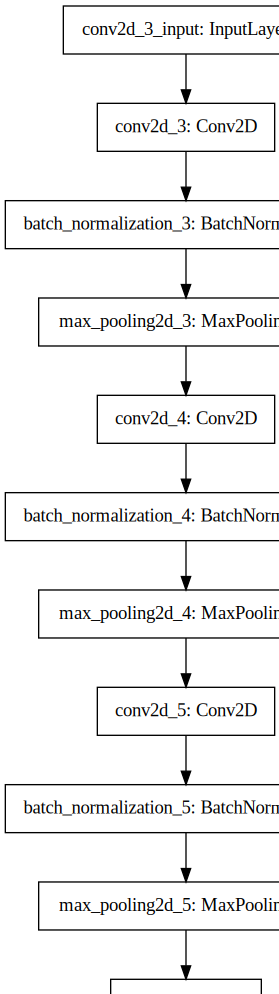

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))